# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari public repositories yaitu Kaggle dengan link sebagai berikut: https://www.kaggle.com/datasets/thedevastator/airlines-traffic-passenger-statistics/data.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset terdiri dari 17 kolom dan tidak memiliki label atau kelas.
   - **Jumlah Baris**: Dataset memiliki 15007 baris.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
       - Activity Period	The date of the activity. (Date)
       - Operating Airline	The airline that operated the flight. (String)
       - Operating Airline IATA Code	The IATA code of the airline that operated the flight. (String)
       - Published Airline	The airline that published the fare for the flight. (String)
       - Published Airline IATA Code	The IATA code of the airline that published the fare for the flight. (String)
       - GEO Summary	A summary of the geographic region. (String)
       - GEO Region	The geographic region. (String)
       - Activity Type Code	The type of activity. (String)
       - Price Category Code	The price category of the fare. (String)
       - Terminal	The terminal of the flight. (String)
       - Boarding Area	The boarding area of the flight. (String)
       - Adjusted Activity Type Code	The type of activity, adjusted for missing data. (String)
     - *Numerikal*: Misalnya usia, pendapatan, harga.
       - Passenger Count	The number of passengers on the flight. (Integer)
       - Adjusted Passenger Count	The number of passengers on the flight, adjusted for missing data. (Integer)
       - Year	The year of the activity. (Integer)
       - Month	The month of the activity. (Integer)
     

3. **Pembatasan**:  
   Dataset yang digunakan tidak sama seperti yang digunakan dalam latihan clustering (seperti customer segmentation).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Struktur Data

- Tinjau jumlah baris dan kolom dalam dataset.
- Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [3]:
df.drop(columns='index', inplace=True)

In [4]:
df.shape

(15007, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

## Menangani Data yang Hilang

- Identifikasi dan analisis data yang hilang (missing values). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [6]:
missing_value = df.isnull().sum()
missing_value[missing_value > 0]

,0
Operating Airline IATA Code,54
Published Airline IATA Code,54


## Analisis Distribusi dan Korelasi

- Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
- Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

In [7]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_features].describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,29331.917105,2010.385220
std,313.336196,58319.509284,58284.182219,3.137589
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,5495.500000,2008.000000
50%,201011.000000,9210.000000,9354.000000,2010.000000
75%,201308.000000,21158.500000,21182.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


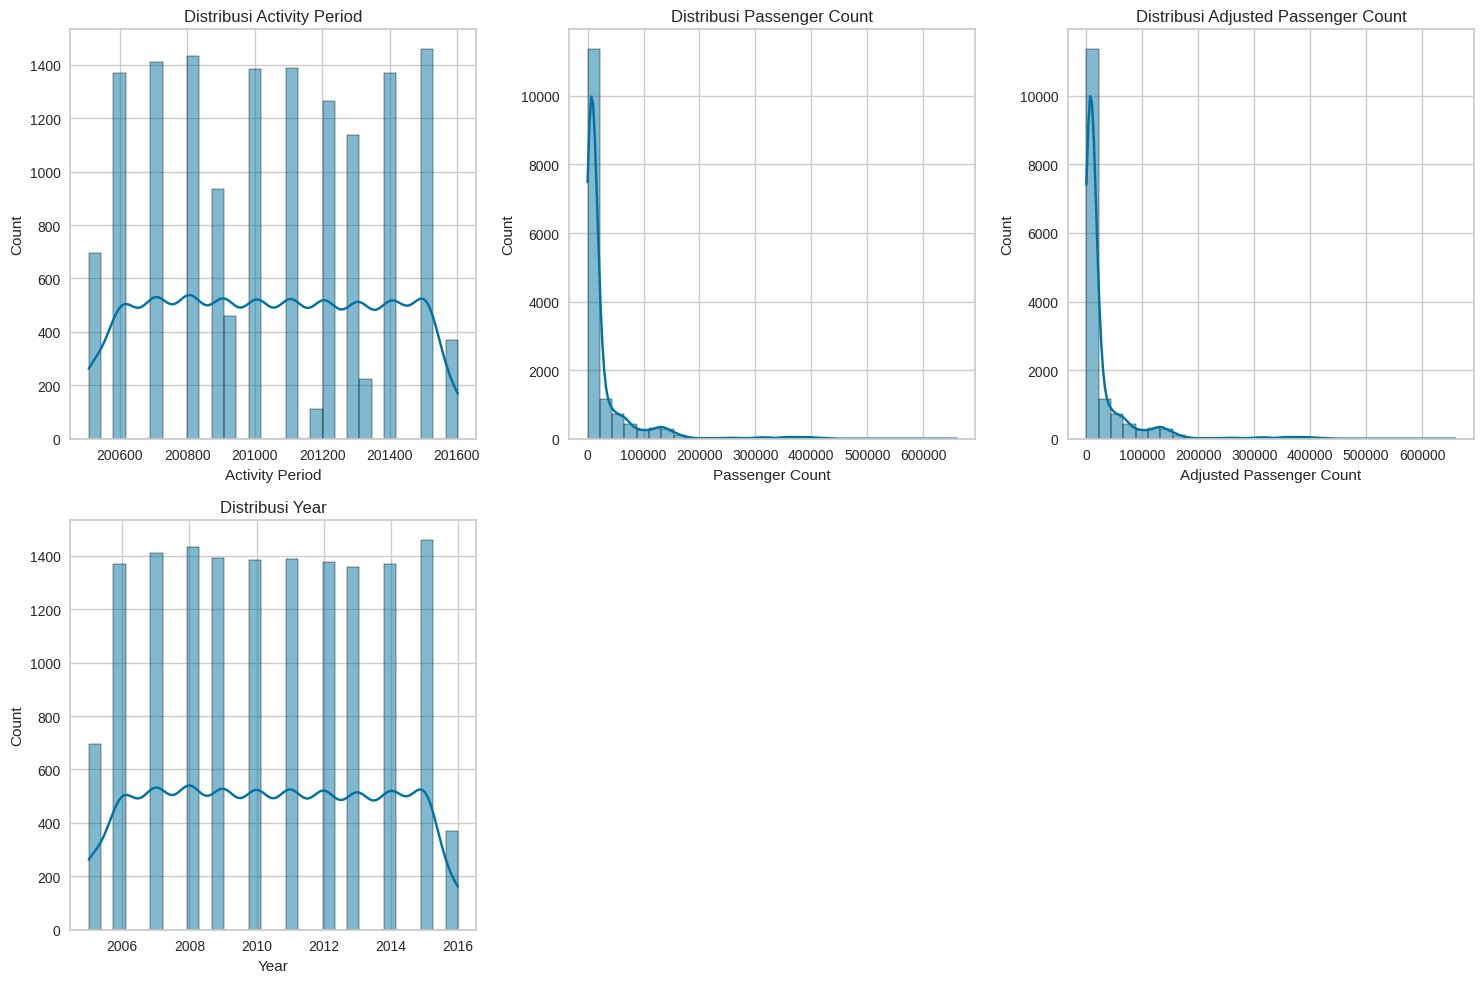

In [8]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
  plt.subplot(2, 3, i)
  sns.histplot(data=df[column], kde=True, bins=30)
  plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

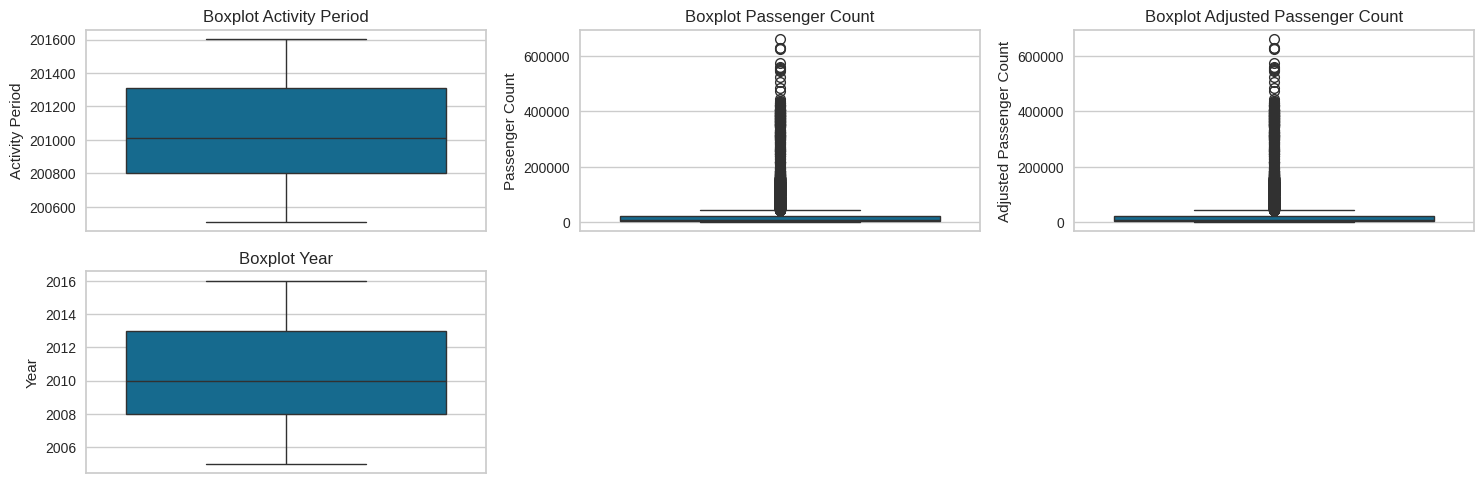

In [9]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_features, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(data=df[column])
  plt.title(f'Boxplot {column}')

plt.tight_layout()
plt.show()

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_features].corr()
correlation_matrix

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
Activity Period,1.000000,0.060311,0.059336,0.999940
Passenger Count,0.060311,1.000000,0.999941,0.060069
Adjusted Passenger Count,0.059336,0.999941,1.000000,0.059096
Year,0.999940,0.060069,0.059096,1.000000


<Figure size 1000x800 with 0 Axes>

## Visualisasi Data

- Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
- Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

In [11]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['Operating Airline', 'Operating Airline IATA Code', 'Published Airline',
       'Published Airline IATA Code', 'GEO Summary', 'GEO Region',
       'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Adjusted Activity Type Code', 'Month'],
      dtype='object')

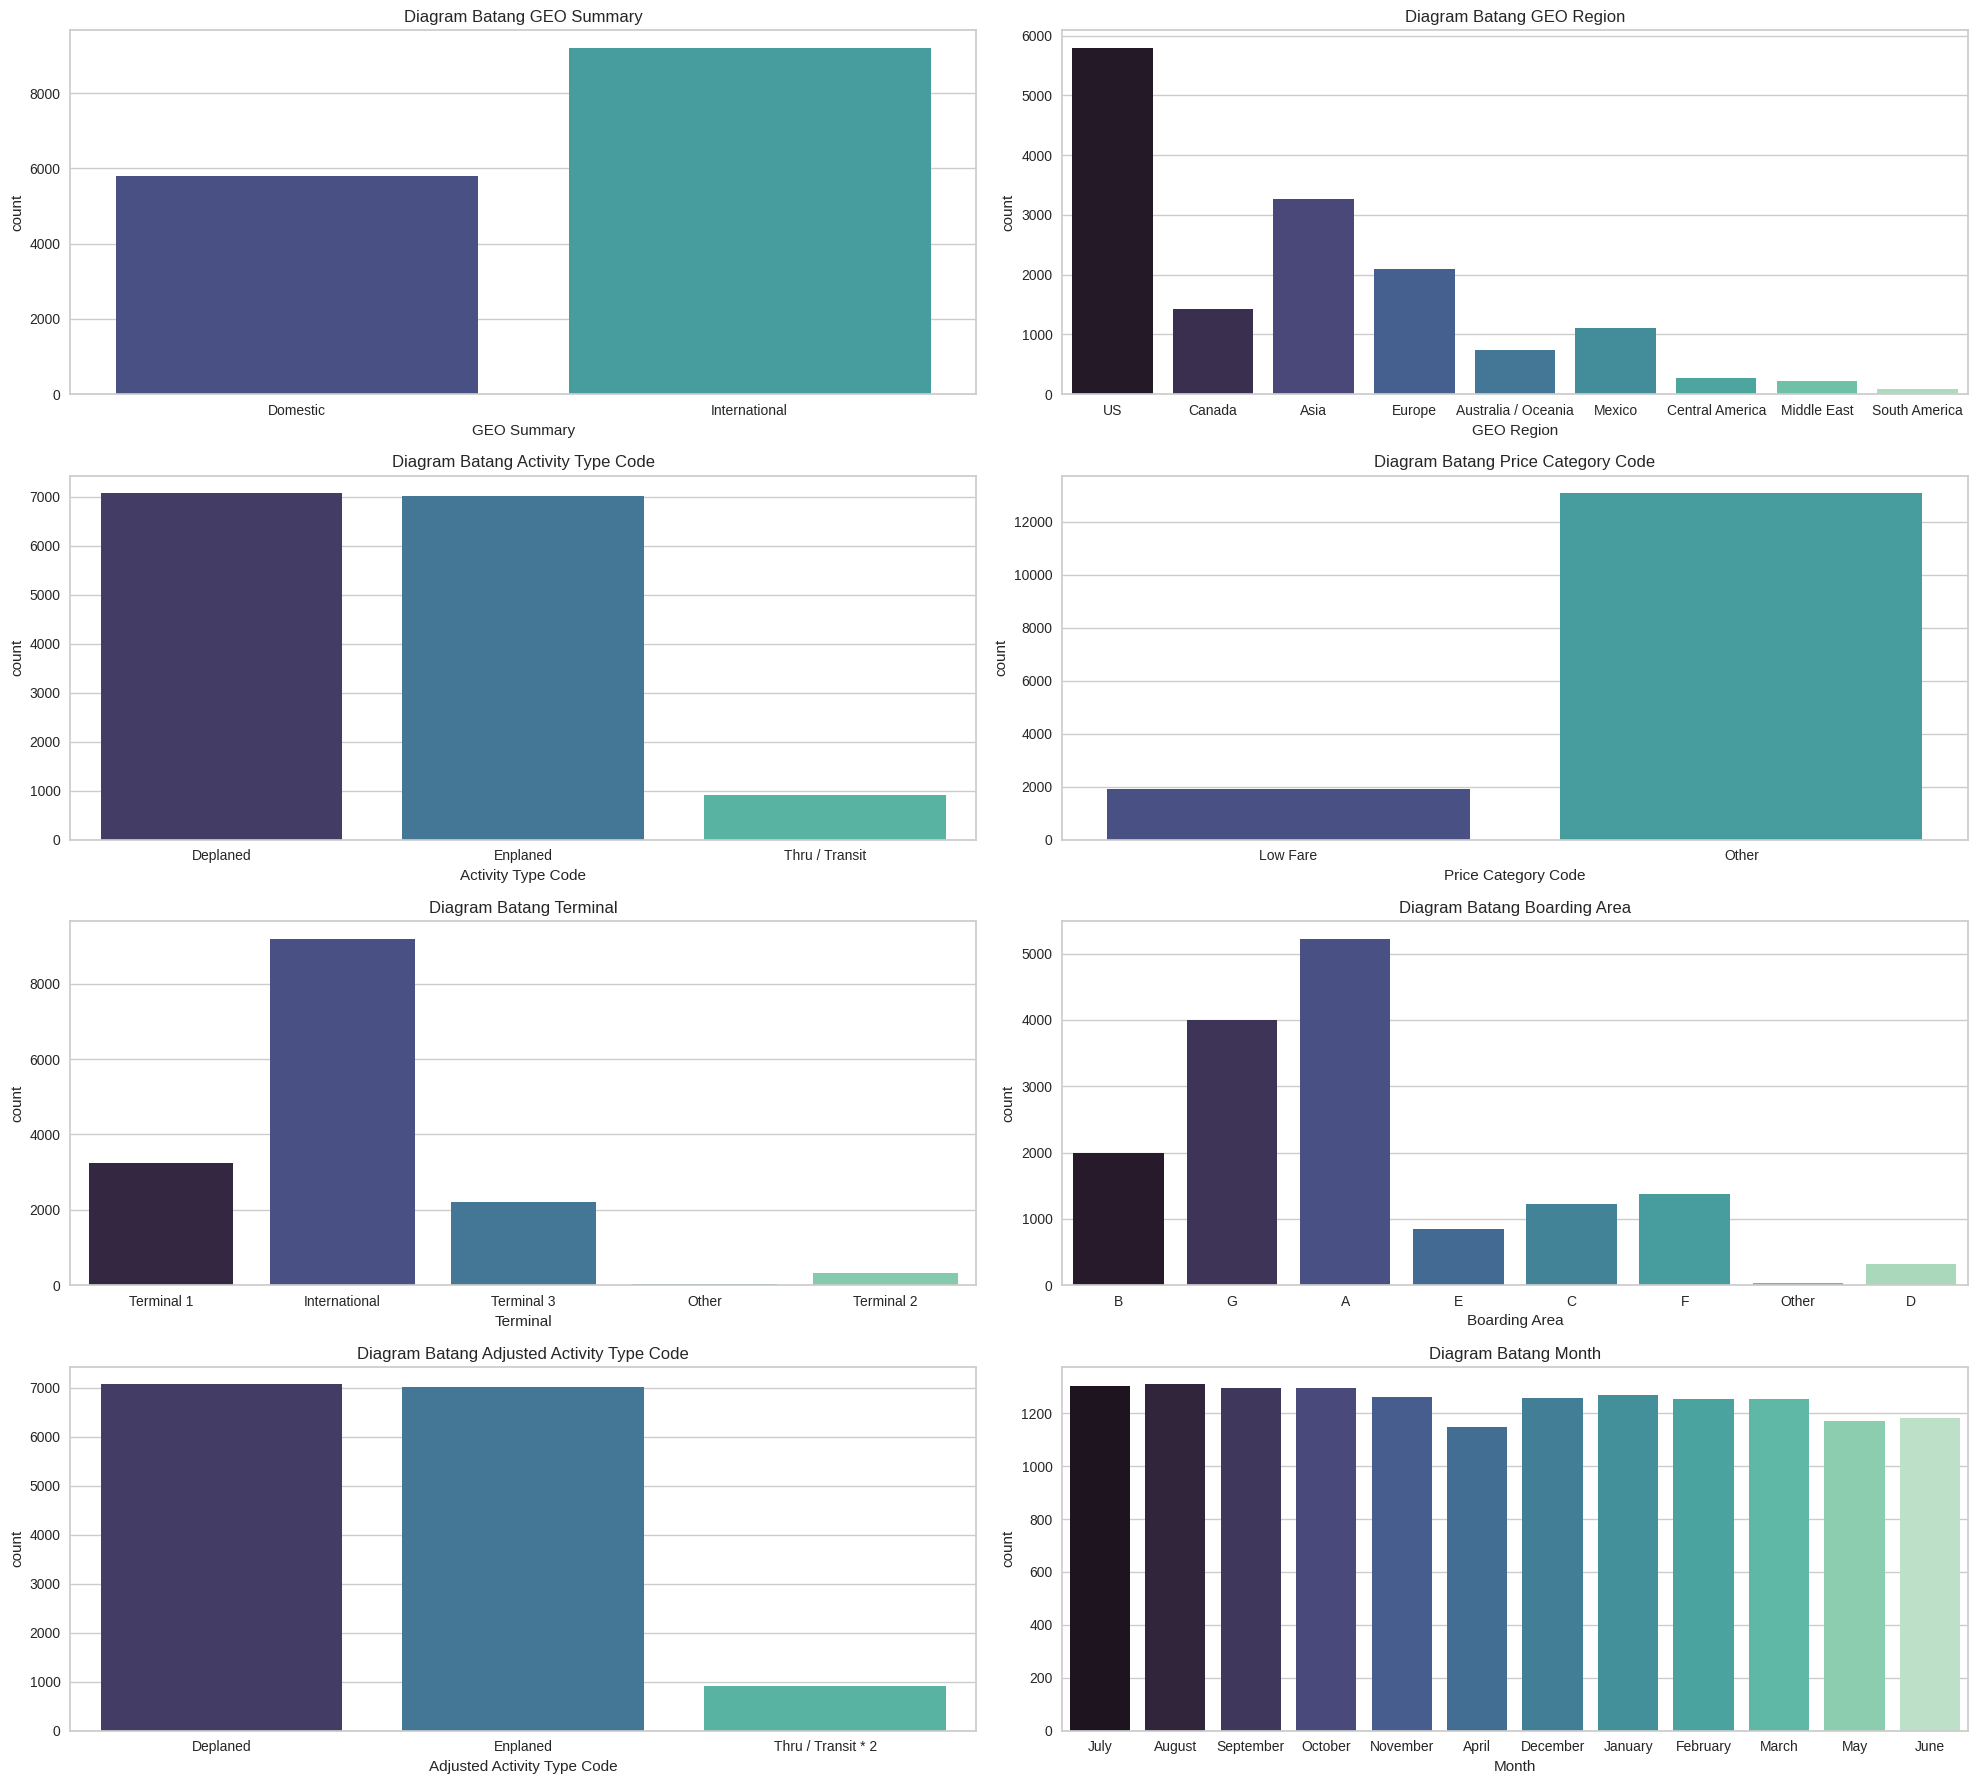

In [12]:
selected_categorical_features = ['GEO Summary', 'GEO Region',
       'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Adjusted Activity Type Code', 'Month']

plt.figure(figsize=(20, 18))
for i, column in enumerate(selected_categorical_features, 1):
  plt.subplot(4, 2, i)
  sns.countplot(data=df, x=column, hue=df[column], legend=False, palette="mako")
  plt.title(f'Diagram Batang {column}')

plt.tight_layout()
plt.show()

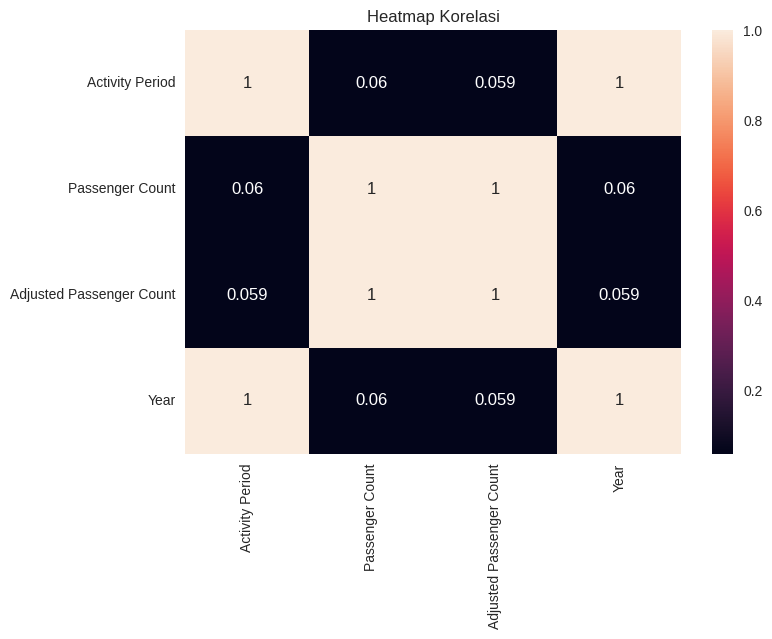

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
missing_value = df.isnull().sum()
missing_value[missing_value > 0]

,0
Operating Airline IATA Code,54
Published Airline IATA Code,54


In [15]:
df.dropna(inplace=True)
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [16]:
df.shape

(14953, 16)

In [17]:
duplicates = df.duplicated().sum()
print("Jumlah baris duplikat: ", duplicates)

Jumlah baris duplikat:  0


In [18]:
df_encoded = df.copy()

# Buat dictionary untuk menyimpan LabelEncoder masing-masing kolom
encoders = {}

for feature in categorical_features:
    lencoder = LabelEncoder()
    df_encoded[feature] = lencoder.fit_transform(df_encoded[feature])  # Transform data
    encoders[feature] = lencoder  # Simpan LabelEncoder untuk inverse_transform nanti

df_encoded[categorical_features].head()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Month
0,0,60,0,54,0,8,0,0,2,1,0,5
1,0,60,0,54,0,8,1,0,2,1,1,5
2,0,60,0,54,0,8,2,0,2,1,2,5
3,4,6,4,6,1,2,0,1,2,1,0,5
4,4,6,4,6,1,2,1,1,2,1,1,5


In [19]:
scaler = StandardScaler()
df_normalized = df_encoded.copy()
df_normalized[numeric_features] = scaler.fit_transform(df_normalized[numeric_features])
df_normalized[numeric_features].head()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
0,-1.713878,-0.035526,-0.037120,-1.712994
1,-1.713878,-0.003675,-0.005249,-1.712994
2,-1.713878,-0.409795,-0.318832,-1.712994
3,-1.713878,0.099499,0.097988,-1.712994
4,-1.713878,0.081244,0.079722,-1.712994


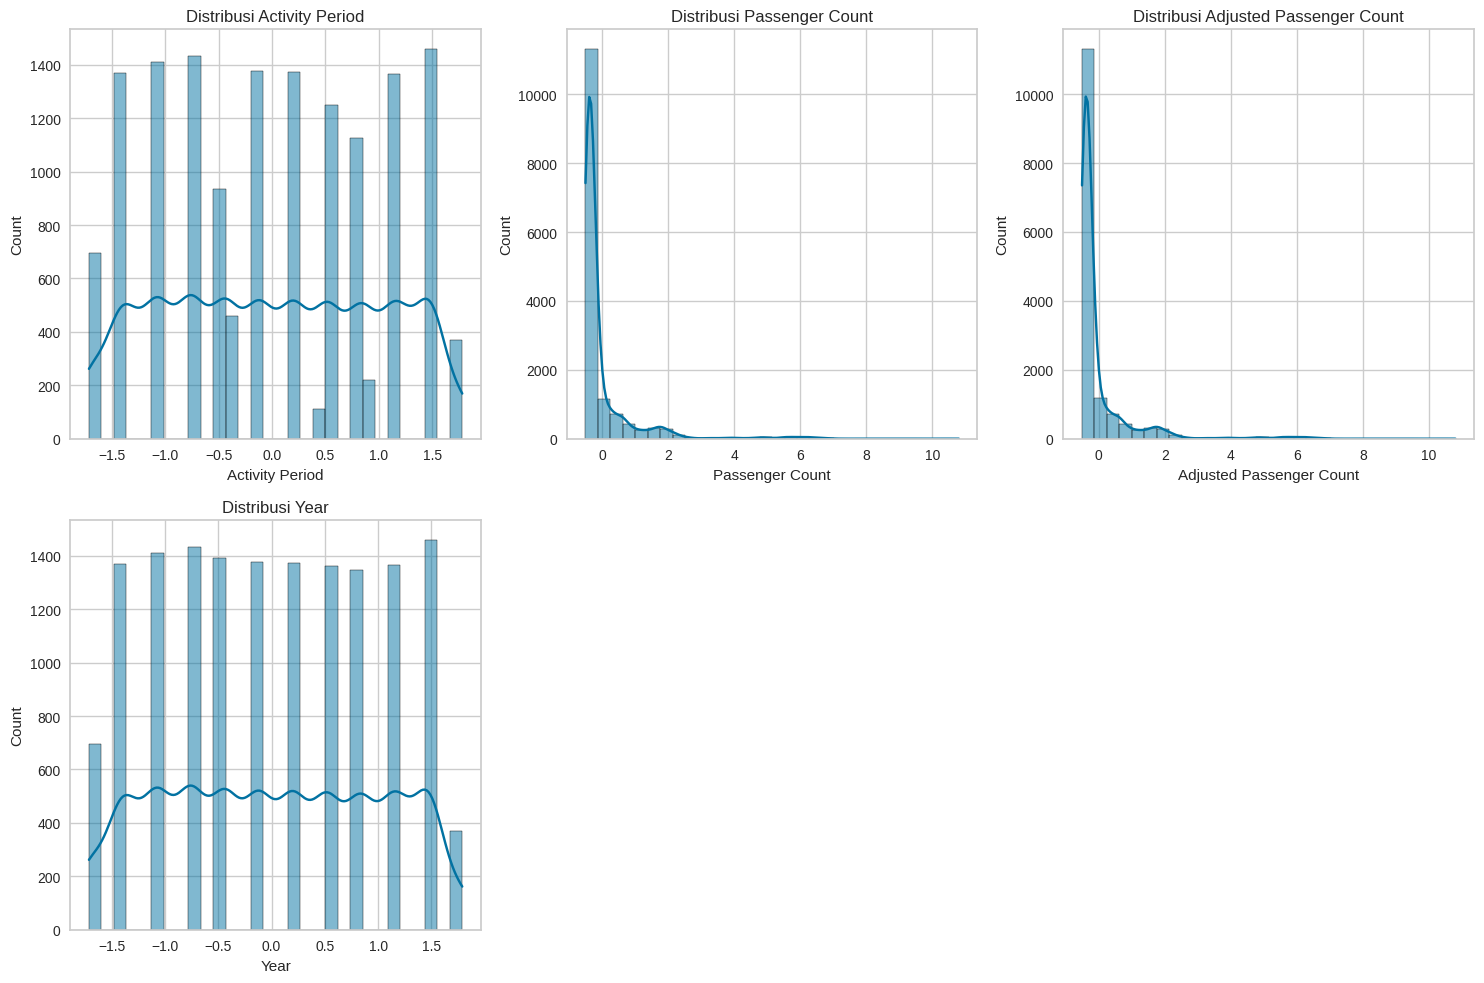

In [20]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
  plt.subplot(2, 3, i)
  sns.histplot(data=df_normalized[column], kde=True, bins=30)
  plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

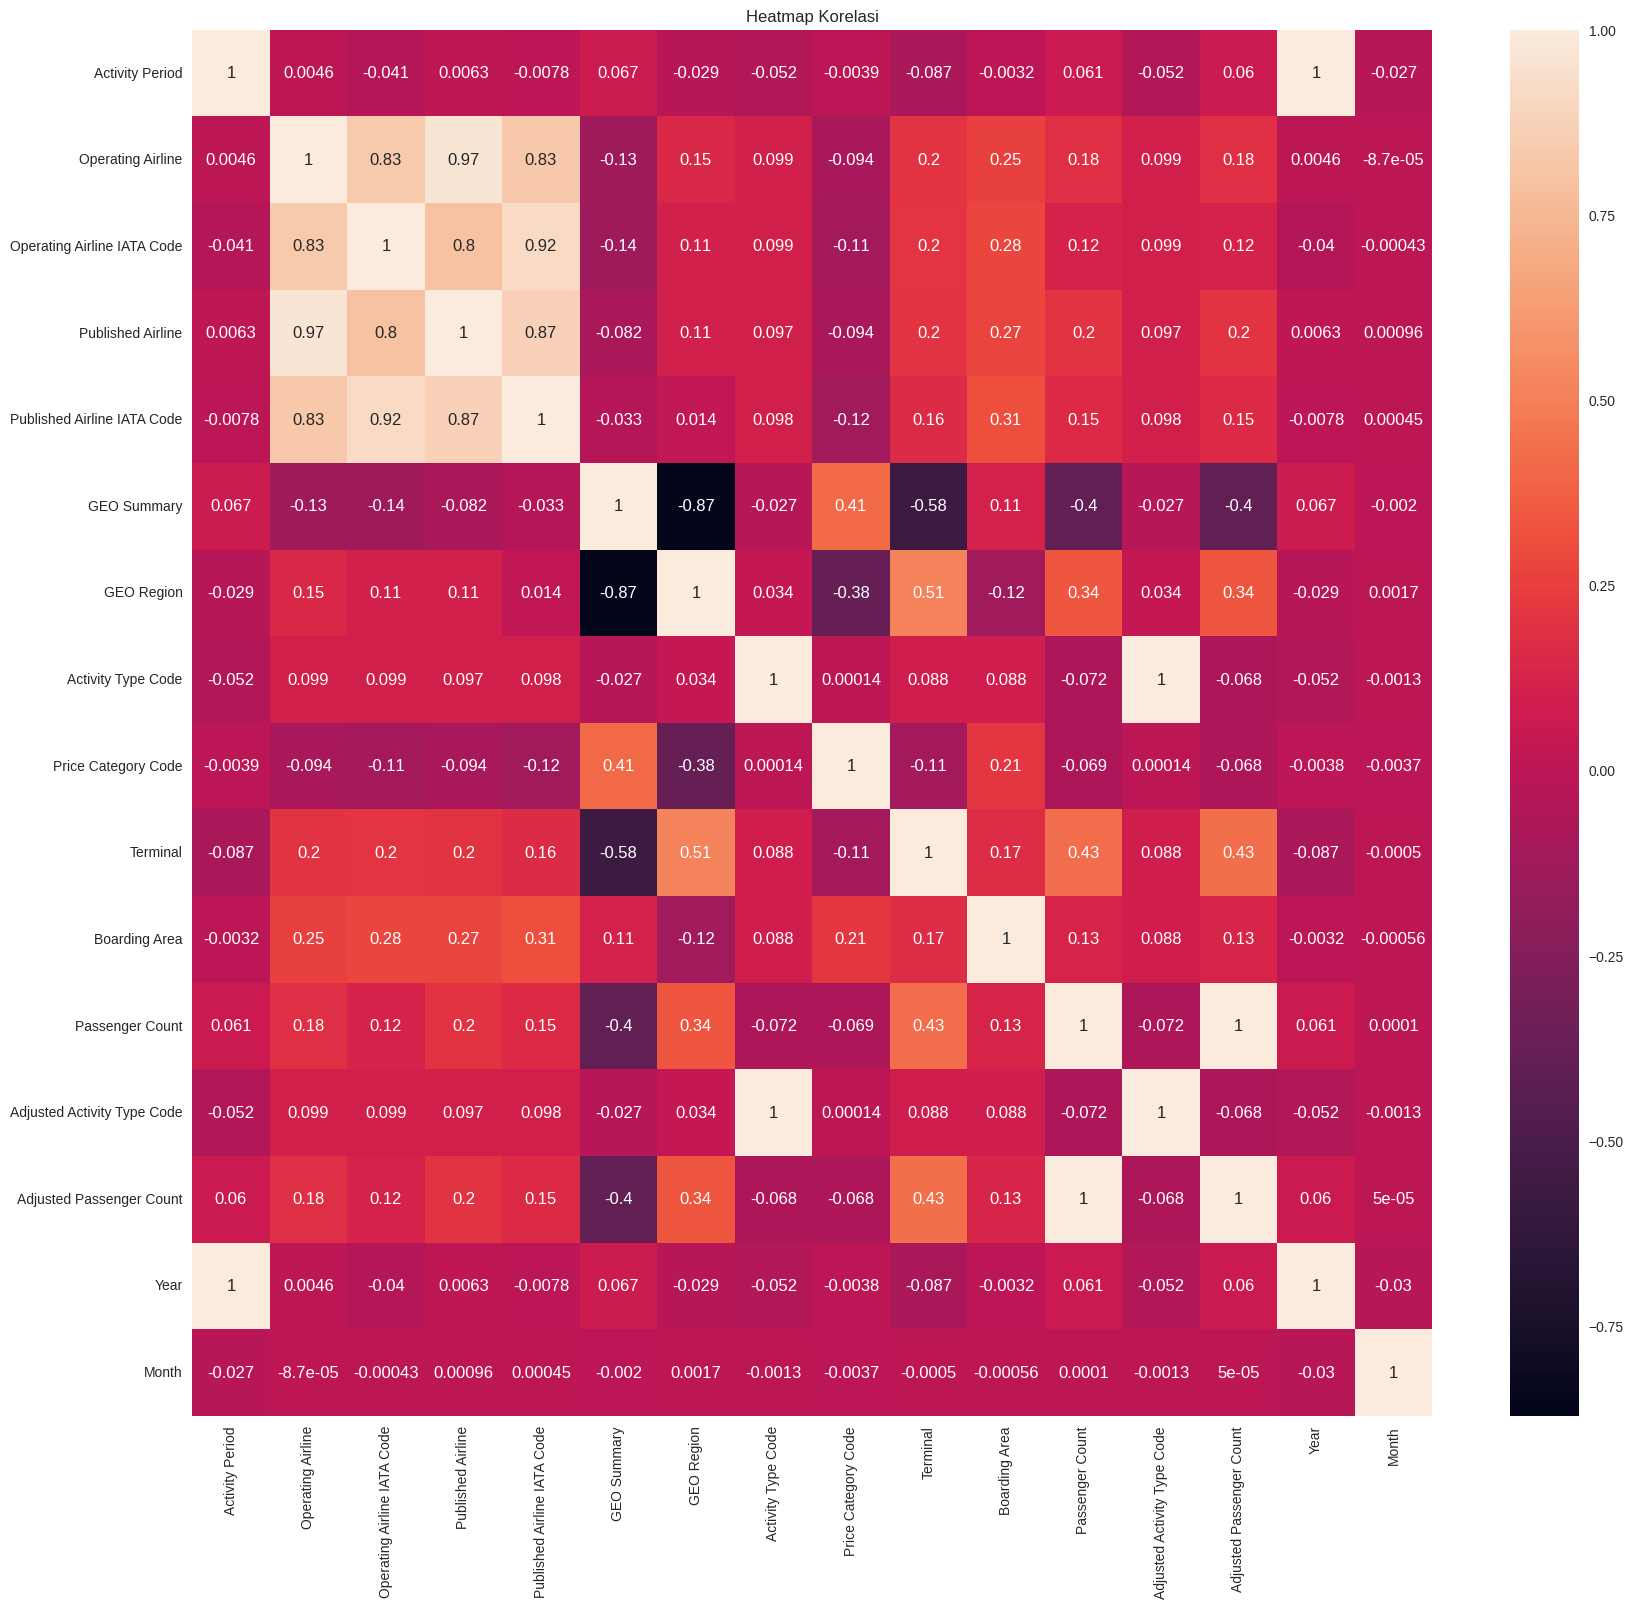

In [21]:
correlation_matrix = df_normalized.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title('Heatmap Korelasi')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
df_normalized.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [23]:
df_normalized

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,-1.713878,0,60,0,54,0,8,0,0,2,1,-0.035526,0,-0.037120,-1.712994,5
1,-1.713878,0,60,0,54,0,8,1,0,2,1,-0.003675,1,-0.005249,-1.712994,5
2,-1.713878,0,60,0,54,0,8,2,0,2,1,-0.409795,2,-0.318832,-1.712994,5
3,-1.713878,4,6,4,6,1,2,0,1,2,1,0.099499,0,0.097988,-1.712994,5
4,-1.713878,4,6,4,6,1,2,1,1,2,1,0.081244,1,0.079722,-1.712994,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,1.780293,67,64,58,58,0,8,1,0,3,3,2.830485,1,2.830638,1.789199,7
15003,1.780293,67,64,58,58,1,5,0,0,0,0,-0.430790,0,-0.432624,1.789199,7
15004,1.780293,67,64,58,58,1,5,1,0,3,3,-0.422159,1,-0.423988,1.789199,7
15005,1.780293,68,63,59,57,1,4,0,1,0,0,-0.291672,0,-0.293421,1.789199,7


In [24]:
X = df_normalized[['Passenger Count', 'GEO Region']].copy()

In [25]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(X)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

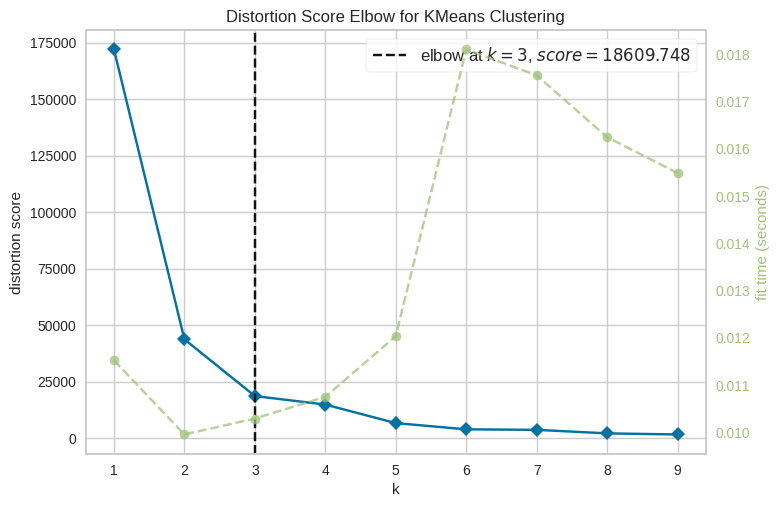

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kmeans_eval = KMeans()
visualizer = KElbowVisualizer(kmeans_eval, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [27]:
sil_score = silhouette_score(X, labels)
wcss = kmeans.inertia_
print("Silhouette Score:", sil_score)
print("WCSS:", wcss)

Silhouette Score: 0.7051986114590251
WCSS: 18609.747813763


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [28]:
selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_filtered = selector.fit_transform(df_normalized, labels)
selected_features = np.array(df_normalized.columns)[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: ['Operating Airline' 'GEO Region']


In [29]:
kmeans_filtered = KMeans(n_clusters=k, random_state=0)
labels_filtered = kmeans_filtered.fit_predict(df_normalized[selected_features])
sil_score_filtered = silhouette_score(X_filtered, labels_filtered)
wcss_filtered = kmeans_filtered.inertia_
print("Silhouette Score:", sil_score_filtered)
print("WCSS:", wcss_filtered)

Silhouette Score: 0.6220583032456013
WCSS: 690853.7023671272


Nilai silhouette score menurun jika dibandingkan dengan sebelum dilakukan proses feature selection, oleh karena itu fitur yang akan digunakan untuk clustering adalah fitur sebelum proses feature selection

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


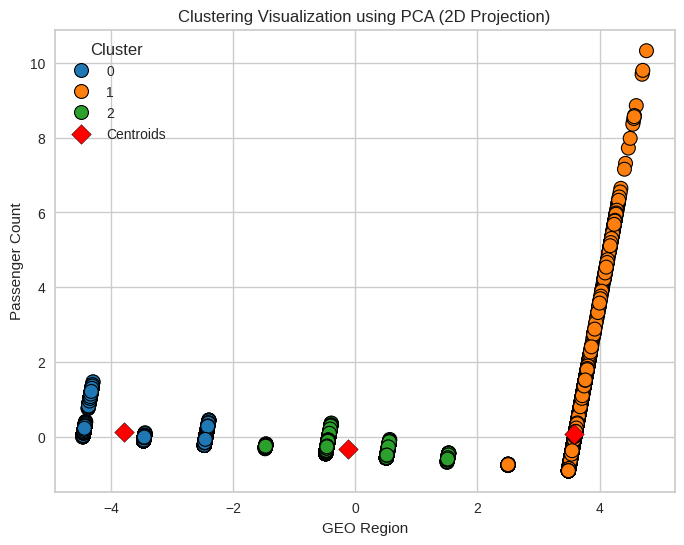

In [30]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)
df_pca

# Visualisasi clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='tab10', s=100, edgecolor='black')

df_pca = np.array(df_pca)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='D', s=100, edgecolor='black', label="Centroids")

plt.title("Clustering Visualization using PCA (2D Projection)")
plt.xlabel("GEO Region")
plt.ylabel("Passenger Count")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [47]:
df_final = df_normalized.copy()
df_final['Cluster'] = labels
df_export = df_final.copy()

for feature in categorical_features:
  df_final[feature] = encoders[feature].inverse_transform(df_final[feature])

df_final

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Cluster
0,-1.713878,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,-0.035526,Deplaned,-0.037120,-1.712994,July,1
1,-1.713878,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,-0.003675,Enplaned,-0.005249,-1.712994,July,1
2,-1.713878,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,-0.409795,Thru / Transit * 2,-0.318832,-1.712994,July,1
3,-1.713878,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,0.099499,Deplaned,0.097988,-1.712994,July,0
4,-1.713878,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,0.081244,Enplaned,0.079722,-1.712994,July,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,1.780293,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,2.830485,Enplaned,2.830638,1.789199,March,1
15003,1.780293,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,-0.430790,Deplaned,-0.432624,1.789199,March,2
15004,1.780293,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,-0.422159,Enplaned,-0.423988,1.789199,March,2
15005,1.780293,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,-0.291672,Deplaned,-0.293421,1.789199,March,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [32]:
df_final[numeric_features] = scaler.inverse_transform(df_final[numeric_features])
df_final

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Cluster
0,200507.0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271.0,Deplaned,27271.0,2005.0,July,1
1,200507.0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131.0,Enplaned,29131.0,2005.0,July,1
2,200507.0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415.0,Thru / Transit * 2,10830.0,2005.0,July,1
3,200507.0,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156.0,Deplaned,35156.0,2005.0,July,0
4,200507.0,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090.0,Enplaned,34090.0,2005.0,July,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603.0,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636.0,Enplaned,194636.0,2016.0,March,1
15003,201603.0,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189.0,Deplaned,4189.0,2016.0,March,2
15004,201603.0,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693.0,Enplaned,4693.0,2016.0,March,2
15005,201603.0,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313.0,Deplaned,12313.0,2016.0,March,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [43]:
numeric_cluster = df_final.groupby('Cluster')[numeric_features].agg('mean')
categorical_cluster = df_final.groupby('Cluster')[categorical_features].agg(lambda x: x.mode().iloc[0])
cluster_analysis = pd.concat([numeric_cluster, categorical_cluster], axis=1)
cluster_analysis

,Activity Period,Passenger Count,Adjusted Passenger Count,Year,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Month
Cluster,,,,,,,,,,,,,,,,
0,201045.226276,11528.847245,11590.555556,2010.386770,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Asia,Deplaned,Other,International,A,Deplaned,October
1,201020.676244,57873.595690,58027.800581,2010.141098,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 1,B,Enplaned,September
2,201081.632781,10288.413428,10325.097309,2010.751019,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Europe,Enplaned,Other,International,A,Enplaned,July


Tulis hasil interpretasinya di sini.
## 1. Cluster 1:
- Rata-rata Passenger Count: 11528.85
- GEO Region: Dominan di Asia
- Activity Type: Deplaned (turun dari pesawat/kedatangan)
- Terminal: International
- Analisis: Cluster ini mencerminkan penerbangan dengan jumlah penumpang relatif sedang yang berfokus pada kedatangan untuk penerbangan Internasional di wilayah Asia. Hal ini menunjukkan bahwa rute penerbangan ke Asia cukup stabil dengan volume penumpang yang cukup ramai.

## 2. Cluster 2:
- Rata-rata Passenger Count: 57873.59
- GEO Region: Didominasi US
- Activity Type: Enplaned (naik pesawat/keberangkatan)
- Terminal: Terminal 1
- Analisis: Cluster ini memiliki jumlah penumpang yang paling tinggi dan didominasi oleh penerbangan dari Amerika Serikat. Ini menunjukkan bahwa rute penerbangan domestik dari AS memiliki demand yang tinggi, bisa dilihat dari volume penumpangnya.

## 3. Cluster 3:
- Rata-rata Passanger Count: 10288.41
- GEO Region: Dominan di Europe
- Activity Type: Enplaned (naik pesawat/keberangkatan)
- Terminal: International
- Analisis: Cluster ini mencakup jumlah penumpang yang paling sedikit, namun perbedaannya tidak terlalu besar bila dibandingkan dengan Cluster 1. Cluster ini didominasi dengan penerbangan internasional dari wilayah Eropa. Hal ini menunjukkan bahwa rute penerbangan dari Eropa memiliki demand yang lebih rendah.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [49]:
df_export.to_csv('air_traffic_clustered.csv', index=False)